In [205]:
import numpy as np
import pandas as pd
import re
from collections import Counter
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/dongxujia/Dropbox/DS-Discovery_GenderDiversity/04_Data/raw/jobads_20152017_applicants.xlsx')

In [3]:
df.shape

(6471, 16)

In [4]:
df.columns

Index(['id', 'job_title_original', 'job_requirement_en', 'job_description_en',
       'job_category', 'length_requirement', 'length_description',
       'job_title_clean', 'job_field', 'job_position', 'job_level', 'job_rank',
       'degree_vocational', 'degree_academic', 'total_candidates',
       'female_share'],
      dtype='object')

In [5]:
df.head()

,id,job_title_original,job_requirement_en,job_description_en,job_category,length_requirement,length_description,job_title_clean,job_field,job_position,job_level,job_rank,degree_vocational,degree_academic,total_candidates,female_share
0,9,central sap key user sd for the area plt oe,maintenance and further development of the glo...,maintenance and further development of the glo...,marketing_and_sales,166,166,key user,NaN,NaN,NaN,NaN,0,1,1,0.0
1,46,system engineer automotive security privacy,university degree in computer science or equi...,university degree in computer science or equi...,engineering,83,83,engineer,system,engineer,NaN,NaN,0,1,1,0.0
2,1086,lnd_150110_transferstelle pd,development of platform components for adas sy...,development of platform components for adas sy...,engineering,250,250,missing,NaN,NaN,NaN,NaN,0,1,1,1.0
3,1663,logistic,logistic development and implementation of the...,logistic development and implementation of the...,manufacturing_operations_and_production,25,25,missing,NaN,NaN,NaN,NaN,0,0,1,0.0
4,1733,central key user manufacturing controlling suite,implement manufacturing accounting standard in...,implement manufacturing accounting standard in...,information_technology,123,123,key user,NaN,NaN,NaN,NaN,0,0,1,0.0


# genderdecoder 

In [6]:
import os 
os.getcwd()

'/Users/dongxujia/Desktop/Research'

In [7]:
import sys
sys.path.append('genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/assess')

In [8]:
from genderDecoder import assess

In [9]:
# example of genderDecoder

assess("independent strong interpersonal dominant polite driven")

{'result': 'masculine-coded',
 'explanation': 'This job ad uses more words that are stereotypically masculine than words that are stereotypically feminine. It risks putting women off applying, but will probably encourage men to apply.',
 'masculine_coded_words': ['independent', 'dominant', 'dominant', 'driven'],
 'feminine_coded_words': ['interpersonal', 'interpersonal', 'polite']}

In [10]:
# the original word lists

In [11]:
f = open('/Users/dongxujia/Desktop/Research/genderDecoder/genderDecoder/wordlists_v0.py', 'r')

In [12]:
a = f.read()

In [13]:
print(a)

feminine_coded_words = [
    "agree",
    "affectionate",
    "child",
    "cheer",
    "collab",
    "commit",
    "communal",
    "compassion",
    "connect",
    "considerate",
    "cooperat",
    "co-operat",
    "depend",
    "emotiona",
    "empath",
    "feel",
    "flatterable",
    "gentle",
    "honest",
    "interpersonal",
    "interdependen",
    "interpersona",
    "inter-personal",
    "inter-dependen",
    "inter-persona",
    "kind",
    "kinship",
    "loyal",
    "modesty",
    "nag",
    "nurtur",
    "pleasant",
    "polite",
    "quiet",
    "respon",
    "sensitiv",
    "submissive",
    "support",
    "sympath",
    "tender",
    "together",
    "trust",
    "understand",
    "warm",
    "whin",
    "enthusias",
    "inclusive",
    "yield",
    "shar"]

masculine_coded_words = [
    "active",
    "adventurous",
    "aggress",
    "ambitio",
    "analy",
    "assert",
    "athlet",
    "autonom",
    "battle",
    "boast",
    "challeng",
    "champion",
    "co

In [14]:
f.close()

In [15]:
feminine_coded_words = [
    "agree",
    "affectionate",
    "child",
    "cheer",
    "collab",
    "commit",
    "communal",
    "compassion",
    "connect",
    "considerate",
    "cooperat",
    "co-operat",
    "depend",
    "emotiona",
    "empath",
    "feel",
    "flatterable",
    "gentle",
    "honest",
    "interpersonal",
    "interdependen",
    "interpersona",
    "inter-personal",
    "inter-dependen",
    "inter-persona",
    "kind",
    "kinship",
    "loyal",
    "modesty",
    "nag",
    "nurtur",
    "pleasant",
    "polite",
    "quiet",
    "respon",
    "sensitiv",
    "submissive",
    "support",
    "sympath",
    "tender",
    "together",
    "trust",
    "understand",
    "warm",
    "whin",
    "enthusias",
    "inclusive",
    "yield",
    "shar"]

In [16]:
masculine_coded_words = [
    "active",
    "adventurous",
    "aggress",
    "ambitio",
    "analy",
    "assert",
    "athlet",
    "autonom",
    "battle",
    "boast",
    "challeng",
    "champion",
    "compet",
    "confident",
    "courag",
    "decid",
    "decision",
    "decisive",
    "defend",
    "determin",
    "domina",
    "dominant",
    "driven",
    "fearless",
    "fight",
    "force",
    "greedy",
    "head-strong",
    "headstrong",
    "hierarch",
    "hostil",
    "implusive",
    "independen",
    "individual",
    "intellect",
    "lead",
    "logic",
    "objective",
    "opinion",
    "outspoken",
    "persist",
    "principle",
    "reckless",
    "self-confiden",
    "self-relian",
    "self-sufficien",
    "selfconfiden",
    "selfrelian",
    "selfsufficien",
    "stubborn",
    "superior",
    "unreasonab"]

In [17]:
# some modifications

In [18]:
remove_female = [
    "agree",
    "commit",
    "feel",
    "support",
    "enthusias",
    "yield"]

In [19]:
add_female = [
    "team",
    "communicat",
    "flexib",
    "team-player",
    "team-capability"
]

In [20]:
remove_male = [
    "unreasonab"]

In [21]:
add_male = [
    "self-driven",
    "selfdriven",
    "self-motivated",
    "selfmotivated",
    "problem-solving",
    "mathematical",
    "leadership",
    "maintain",
    "manage",
    "monitor",
    "strateg",
    "travel",
    "supervis",
    "proactive",
    "pressure"
]

In [22]:
feminine_coded_words.extend(add_female)

In [23]:
for x in remove_female:
    feminine_coded_words.remove(x)

In [24]:
masculine_coded_words.extend(add_male)

In [25]:
for z in remove_male:
    masculine_coded_words.remove(z)

In [26]:
feminine_coded_words

['affectionate',
 'child',
 'cheer',
 'collab',
 'communal',
 'compassion',
 'connect',
 'considerate',
 'cooperat',
 'co-operat',
 'depend',
 'emotiona',
 'empath',
 'flatterable',
 'gentle',
 'honest',
 'interpersonal',
 'interdependen',
 'interpersona',
 'inter-personal',
 'inter-dependen',
 'inter-persona',
 'kind',
 'kinship',
 'loyal',
 'modesty',
 'nag',
 'nurtur',
 'pleasant',
 'polite',
 'quiet',
 'respon',
 'sensitiv',
 'submissive',
 'sympath',
 'tender',
 'together',
 'trust',
 'understand',
 'warm',
 'whin',
 'inclusive',
 'shar',
 'team',
 'communicat',
 'flexib',
 'team-player',
 'team-capability']

In [27]:
masculine_coded_words

['active',
 'adventurous',
 'aggress',
 'ambitio',
 'analy',
 'assert',
 'athlet',
 'autonom',
 'battle',
 'boast',
 'challeng',
 'champion',
 'compet',
 'confident',
 'courag',
 'decid',
 'decision',
 'decisive',
 'defend',
 'determin',
 'domina',
 'dominant',
 'driven',
 'fearless',
 'fight',
 'force',
 'greedy',
 'head-strong',
 'headstrong',
 'hierarch',
 'hostil',
 'implusive',
 'independen',
 'individual',
 'intellect',
 'lead',
 'logic',
 'objective',
 'opinion',
 'outspoken',
 'persist',
 'principle',
 'reckless',
 'self-confiden',
 'self-relian',
 'self-sufficien',
 'selfconfiden',
 'selfrelian',
 'selfsufficien',
 'stubborn',
 'superior',
 'self-driven',
 'selfdriven',
 'self-motivated',
 'selfmotivated',
 'problem-solving',
 'mathematical',
 'leadership',
 'maintain',
 'manage',
 'monitor',
 'strateg',
 'travel',
 'supervis',
 'proactive',
 'pressure']

In [28]:
# construct a new wordslist.py in the folder using the updated two lists

In [29]:
#apply gender decoder on job_requirements and job_description separately

In [30]:
df['job_requirement_decoder'] = df.job_requirement_en.dropna().apply(assess)

In [31]:
# 1 row has null value

df.job_requirement_decoder.isnull().value_counts()

False    6470
True        1
Name: job_requirement_decoder, dtype: int64

In [32]:
df['job_requirement_result'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_requirement_masculine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_requirement_feminine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [33]:
df['job_description_decoder'] = df.job_description_en.dropna().apply(assess)

In [34]:
# 1 row has null value

df.job_description_decoder.isnull().value_counts()

False    6470
True        1
Name: job_description_decoder, dtype: int64

In [161]:
# drop null row

df = df[df.job_description_decoder.notnull()]

In [35]:
df['job_description_result'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_description_masculine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_description_feminine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [36]:
# this entry has neither job_requirement nor job_description

In [37]:
df[(df.job_description_decoder.isnull()) | (df.job_requirement_decoder.isnull())]

,id,job_title_original,job_requirement_en,job_description_en,job_category,length_requirement,length_description,job_title_clean,job_field,job_position,job_level,job_rank,degree_vocational,degree_academic,total_candidates,female_share,job_requirement_decoder,job_requirement_result,job_requirement_masculine_coded_words,job_requirement_feminine_coded_words,job_description_decoder,job_description_result,job_description_masculine_coded_words,job_description_feminine_coded_words
8,2264,leader platform team,NaN,NaN,engineering,0,0,leader,NaN,NaN,leader,NaN,0,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.job_requirement_result.unique()

array(['feminine-coded', 'masculine-coded', 'strongly masculine-coded',
       'neutral', nan, 'strongly feminine-coded'], dtype=object)

In [39]:
# count results for job_requirement

df.job_requirement_result.value_counts()

masculine-coded             2565
feminine-coded              1399
neutral                     1371
strongly masculine-coded     583
strongly feminine-coded      552
Name: job_requirement_result, dtype: int64

In [40]:
# count results for job_description

df.job_description_result.value_counts()

masculine-coded             2950
feminine-coded              1085
strongly masculine-coded    1080
neutral                      989
strongly feminine-coded      366
Name: job_description_result, dtype: int64

In [41]:
# create numerical value mapping for the result, 
decoder_result_mapping = {
    "strongly feminine-coded" : -2, 
    "feminine-coded" : -1,
    "neutral": 0,
    "masculine-coded": 1,
    "strongly masculine-coded": 2}

In [42]:
# Assign a score for each entry's job_requirement_result and job_description_result

df['job_requirement_score'] = df.job_requirement_result.map(decoder_result_mapping)

In [43]:
df['job_description_score'] = df.job_description_result.map(decoder_result_mapping).astype(float)

In [44]:
df[df['job_requirement_score'] > df['job_description_score']].shape[0]/df.shape[0]

0.24169371040024726

In [45]:
# About 63% of the entries have a higher job_requirement_score, 
# which means their job_requirement are more masculine_coded than their job_description

In [46]:
# adding the two scores together for each entry

In [47]:
# combine ench entry's job_requirement_result with job_description_result

df['combined_score'] = df.job_requirement_score + df.job_description_score

In [48]:
df.combined_score.value_counts()

 2.0    1777
 0.0    1419
 1.0    1106
-1.0     638
 3.0     613
-2.0     514
-3.0     180
 4.0     140
-4.0      83
Name: combined_score, dtype: int64

In [49]:
df.hist(column = 'combined_score',bins = 24);

In [50]:
df.groupby('combined_score')['female_share'].mean()

combined_score
-4.0    0.215309
-3.0    0.228915
-2.0    0.240137
-1.0    0.233834
 0.0    0.253498
 1.0    0.249228
 2.0    0.224501
 3.0    0.227105
 4.0    0.357656
Name: female_share, dtype: float64

In [51]:
df.groupby('job_requirement_score')['female_share'].mean()

job_requirement_score
-2.0    0.273611
-1.0    0.280018
 0.0    0.237961
 1.0    0.214492
 2.0    0.233417
Name: female_share, dtype: float64

In [52]:
df.groupby('job_description_score')['female_share'].mean()

job_description_score
-2.0    0.187173
-1.0    0.211778
 0.0    0.218081
 1.0    0.252218
 2.0    0.275247
Name: female_share, dtype: float64

In [53]:
df.head()

,id,job_title_original,job_requirement_en,job_description_en,job_category,length_requirement,length_description,job_title_clean,job_field,job_position,job_level,job_rank,degree_vocational,degree_academic,total_candidates,female_share,job_requirement_decoder,job_requirement_result,job_requirement_masculine_coded_words,job_requirement_feminine_coded_words,job_description_decoder,job_description_result,job_description_masculine_coded_words,job_description_feminine_coded_words,job_requirement_score,job_description_score,combined_score
0,9,central sap key user sd for the area plt oe,maintenance and further development of the glo...,maintenance and further development of the glo...,marketing_and_sales,166,166,key user,NaN,NaN,NaN,NaN,0,1,1,0.0,"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,"[analysis, management, travel]","[responsible, responsible, understanding, team...","{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,"[analysis, management, travel]","[responsible, responsible, understanding, team...",-1.0,-1.0,-2.0
1,46,system engineer automotive security privacy,university degree in computer science or equi...,university degree in computer science or equi...,engineering,83,83,engineer,system,engineer,NaN,NaN,0,1,1,0.0,"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[actively],"[communication, team]","{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[actively],"[communication, team]",-1.0,-1.0,-2.0
2,1086,lnd_150110_transferstelle pd,development of platform components for adas sy...,development of platform components for adas sy...,engineering,250,250,missing,NaN,NaN,NaN,NaN,0,1,1,1.0,"{'result': 'masculine-coded', 'explanation': '...",masculine-coded,"[lead, strategies, monitor, actively]",[responsibility],"{'result': 'masculine-coded', 'explanation': '...",masculine-coded,"[lead, strategies, monitor, actively]",[responsibility],1.0,1.0,2.0
3,1663,logistic,logistic development and implementation of the...,logistic development and implementation of the...,manufacturing_operations_and_production,25,25,missing,NaN,NaN,NaN,NaN,0,0,1,0.0,"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[leader],[],"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[leader],[],2.0,2.0,4.0
4,1733,central key user manufacturing controlling suite,implement manufacturing accounting standard in...,implement manufacturing accounting standard in...,information_technology,123,123,key user,NaN,NaN,NaN,NaN,0,0,1,0.0,"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[maintain],[],"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[maintain],[],2.0,2.0,4.0


In [54]:
# most common gender decoded words 

In [55]:
count_feminine_description = Counter(" ".join(
    df.job_description_feminine_coded_words.str.join(" ").astype(str)).split(" "))
count_feminine_requirement = Counter(" ".join(
    df.job_requirement_feminine_coded_words.str.join(" ").astype(str)).split(" "))
count_masculine_description = Counter(" ".join(
    df.job_description_masculine_coded_words.str.join(" ").astype(str)).split(" "))
count_masculine_requirement = Counter(" ".join(
    df.job_requirement_masculine_coded_words.str.join(" ").astype(str)).split(" "))

In [56]:
count_feminine = count_feminine_description + count_feminine_requirement
count_masculine = count_masculine_description + count_masculine_requirement

In [57]:
count_feminine.most_common(20)

[('team', 6151),
 ('communication', 5082),
 ('responsible', 3052),
 ('teams', 2369),
 ('cooperation', 2128),
 ('', 2105),
 ('responsibility', 1786),
 ('understanding', 1130),
 ('collaboration', 754),
 ('flexibility', 717),
 ('together', 683),
 ('teamwork', 569),
 ('communications', 403),
 ('responsibilities', 366),
 ('share', 214),
 ('communicate', 195),
 ('connection', 142),
 ('understand', 129),
 ('sharing', 116),
 ('teamoriented', 112)]

In [58]:
count_masculine.most_common(20)

[('management', 11363),
 ('analysis', 3599),
 ('independent', 1793),
 ('leadership', 1724),
 ('monitoring', 1709),
 ('strategy', 1633),
 ('travel', 1578),
 ('competence', 1505),
 ('manager', 1465),
 ('', 1360),
 ('analytical', 1318),
 ('strategic', 1190),
 ('lead', 1096),
 ('leading', 879),
 ('assertiveness', 784),
 ('strategies', 640),
 ('active', 620),
 ('individual', 603),
 ('decision', 516),
 ('manage', 498)]

In [59]:
# compare gender decoded language and female share across job_category

In [60]:
df.job_category.unique()

array(['marketing_and_sales', 'engineering',
       'manufacturing_operations_and_production',
       'information_technology', 'logistics', 'purchasing',
       'administration_and_assistance', 'finance', 'human_resources',
       'health_safety_and_security_environment_facility', 'quality',
       'project_management', 'general_management'], dtype=object)

In [61]:
# the higher the combined score, the more masculine coded the job ads is, 0 is neutral

df[df.job_category.notnull()].groupby('job_category')['combined_score'].mean().sort_values()

job_category
administration_and_assistance                      0.295597
engineering                                        0.375541
human_resources                                    0.434932
manufacturing_operations_and_production            0.870192
marketing_and_sales                                0.903339
logistics                                          0.919847
information_technology                             0.949062
finance                                            0.995338
project_management                                 1.106918
purchasing                                         1.287938
quality                                            1.304740
general_management                                 1.489362
health_safety_and_security_environment_facility    1.569231
Name: combined_score, dtype: float64

In [62]:
df[df.job_category.notnull()].groupby('job_category')['female_share'].mean().sort_values()

job_category
engineering                                        0.124731
manufacturing_operations_and_production            0.144573
general_management                                 0.150227
information_technology                             0.185819
quality                                            0.210982
project_management                                 0.222237
health_safety_and_security_environment_facility    0.242137
marketing_and_sales                                0.317680
logistics                                          0.354387
purchasing                                         0.369011
finance                                            0.394983
human_resources                                    0.740253
administration_and_assistance                      0.839064
Name: female_share, dtype: float64

In [63]:
# compare gender decoded language and female share across job_title_clean

In [64]:
df.job_title_clean.unique()

array(['key user', 'engineer', 'missing', 'team leader', 'leader',
       'logistics', 'expert', 'coordinator', 'projectmanager',
       'purchaser', 'manager', 'administrator_assistant', 'it', 'coach',
       'analyst', 'controller', 'hr', 'quality manager', 'technician',
       'employee', 'department leader', 'lawyer', 'electrician',
       'supplier', 'clerk', 'group leader', 'accountant', 'sales', 'head',
       'communication', 'account manager', 'planner', 'consultant',
       'marketing', 'data scientist', 'researcher', 'audit',
       'acquisition', 'production', 'area leader', 'layer leader',
       'graduate'], dtype=object)

In [65]:
df[df.job_title_clean.notnull()].groupby('job_title_clean')['combined_score'].mean().sort_values()

job_title_clean
communication             -0.945055
layer leader              -0.928571
lawyer                    -0.900000
accountant                 0.035714
technician                 0.141026
engineer                   0.165887
hr                         0.182432
marketing                  0.205882
graduate                   0.250000
administrator_assistant    0.275000
key user                   0.551724
clerk                      0.602564
area leader                0.739130
missing                    0.754967
employee                   0.822581
electrician                0.850000
manager                    0.855691
department leader          0.866667
team leader                0.867925
data scientist             0.884615
controller                 0.886957
expert                     0.893491
coordinator                0.921053
logistics                  0.954545
it                         0.960526
production                 0.973684
coach                      0.984615
audit       

In [66]:
df[df.job_title_clean.notnull()].groupby('job_title_clean')['female_share'].mean().sort_values()

job_title_clean
layer leader               0.017857
technician                 0.056446
department leader          0.100000
engineer                   0.122747
leader                     0.124784
researcher                 0.129032
data scientist             0.135562
group leader               0.142779
projectmanager             0.143822
acquisition                0.150000
it                         0.154527
production                 0.155755
head                       0.159287
team leader                0.169220
account manager            0.170627
missing                    0.205890
key user                   0.207417
quality manager            0.207603
manager                    0.237265
consultant                 0.237457
electrician                0.241667
graduate                   0.250000
supplier                   0.253175
area leader                0.262319
lawyer                     0.266667
sales                      0.269229
audit                      0.274359
planner     

In [67]:
# compare gender decoded language and female share across job_field

In [68]:
df.job_field.unique()

array([nan, 'system', 'test', 'logistics', 'hardware', 'function',
       'automotive', 'industrial', 'development', 'quality', 'software',
       'design', 'requirement', 'application', 'calibration',
       'calculation', 'cloud', 'chemical', 'acoustics', 'devops',
       'electronics', 'resident', 'analysis', 'chemist', 'android',
       'algorithm'], dtype=object)

In [69]:
df[df.job_field.notnull()].groupby('job_field')['combined_score'].mean().sort_values()

job_field
android       -4.000000
algorithm     -0.714286
design        -0.625000
acoustics     -0.500000
hardware      -0.356436
calculation   -0.166667
software       0.087879
devops         0.100000
electronics    0.114754
resident       0.235294
test           0.277027
development    0.367681
function       0.463235
requirement    0.703704
industrial     0.715789
system         0.717629
calibration    0.800000
application    0.819444
automotive     0.898734
chemical       1.000000
logistics      1.007812
cloud          1.058824
chemist        1.222222
quality        1.384375
analysis       1.512821
Name: combined_score, dtype: float64

In [70]:
df[df.job_field.notnull()].groupby('job_field')['female_share'].mean().sort_values()

job_field
acoustics      0.000000
android        0.000000
calculation    0.033333
devops         0.033333
algorithm      0.059524
calibration    0.075000
hardware       0.076898
test           0.089897
electronics    0.105738
design         0.113750
cloud          0.127451
system         0.135992
software       0.148995
development    0.159125
industrial     0.161925
function       0.162648
application    0.176113
quality        0.193901
automotive     0.227250
chemist        0.250000
resident       0.254902
chemical       0.261905
analysis       0.268661
requirement    0.321914
logistics      0.372807
Name: female_share, dtype: float64

In [71]:
# compare gender decoded language and female share across job_position

In [72]:
df.job_position.unique()

array([nan, 'engineer', 'specialist', 'projectmanager', 'manager',
       'developer', 'administrator_assistant', 'expert', 'technician',
       'architect', 'consultant', 'designer', 'integrator'], dtype=object)

In [73]:
df[df.job_position.notnull()].groupby('job_position')['combined_score'].mean().sort_values()

job_position
designer                  -0.718310
technician                 0.027778
architect                  0.123457
developer                  0.134831
engineer                   0.223343
administrator_assistant    0.318352
expert                     0.486486
integrator                 0.628571
specialist                 0.882353
projectmanager             1.025845
manager                    1.039370
consultant                 1.157895
Name: combined_score, dtype: float64

In [74]:
df[df.job_position.notnull()].groupby('job_position')['female_share'].mean().sort_values()

job_position
technician                 0.060764
integrator                 0.106122
engineer                   0.111412
architect                  0.127484
designer                   0.133333
projectmanager             0.155762
developer                  0.159673
expert                     0.191568
consultant                 0.270142
manager                    0.270486
specialist                 0.389599
administrator_assistant    0.756153
Name: female_share, dtype: float64

In [75]:
# compare gender decoded language and female share across job_level

In [76]:
df.job_level.unique()

array([nan, 'team', 'leader', 'department', 'group', 'head', 'director',
       'area'], dtype=object)

In [77]:
df[df.job_level.notnull()].groupby('job_level')['combined_score'].mean().sort_values()

job_level
area          0.739130
department    0.785714
team          0.915966
leader        0.987952
group         1.210084
head          1.358056
director      1.619048
Name: combined_score, dtype: float64

In [78]:
df[df.job_level.notnull()].groupby('job_level')['female_share'].mean().sort_values()

job_level
department    0.071429
leader        0.140135
group         0.140379
head          0.167160
director      0.175057
team          0.177624
area          0.262319
Name: female_share, dtype: float64

In [79]:
# compare gender decoded language and female share across job_rank

In [80]:
df.job_rank.unique()

array([nan, 'clerk', 'junior', 'employee', 'advanced', 'executive',
       'senior', 'associate '], dtype=object)

In [81]:
df[df.job_rank.notnull()].groupby('job_rank')['combined_score'].mean().sort_values()

job_rank
junior        0.409836
clerk         0.566372
advanced      0.600000
employee      0.751196
senior        0.804688
executive     1.576471
associate     2.000000
Name: combined_score, dtype: float64

In [82]:
df[df.job_rank.notnull()].groupby('job_rank')['female_share'].mean().sort_values()

job_rank
executive     0.145318
senior        0.184358
advanced      0.212738
associate     0.250000
employee      0.367629
junior        0.432771
clerk         0.557880
Name: female_share, dtype: float64

In [83]:
df.combined_score.value_counts().sort_index()

-4.0      83
-3.0     180
-2.0     514
-1.0     638
 0.0    1419
 1.0    1106
 2.0    1777
 3.0     613
 4.0     140
Name: combined_score, dtype: int64

## A/B TESTING only focused on job_requirement 

### Null Hypothesis: 
The distribution of female share of applications to jobs with masculine coded requirements is the same as that of female share of applications to jobs with non-masculine coded requirements; the difference in the two samples is just due to chance.

### Alternative Hypothesis: 
The distribution of female share of applications to jobs with masculine coded requirements is different from that of female share of applications to jobs with non-masculine coded requirements.

### Note: 
1. Masculine-coded job requirements are those that return positive scores after being passed in gender decoder; 
2. female share here is divided into two categories: 0 represents female share being equal or bigger than 0.5, 1 represents female share being less than 0.5.

In [84]:
# create another column called generalized_result,
# 'masculine_coded' if job_requirement_score > 0 (masculine coded), 
# 'non_masculine_coded' if job_requirement_score <= 0 (neutral or feminine coded)
df.loc[df.job_requirement_score > 0, 'generalized_result'] = 'masculine_coded'
df.loc[df.job_requirement_score <= 0,'generalized_result'] = 'non_masculine_coded'

In [85]:
df.generalized_result.value_counts()

non_masculine_coded    3322
masculine_coded        3148
Name: generalized_result, dtype: int64

In [86]:
# create another column called generalized_female_share
# 1 if female_share < 0.5
# 0 if female_share >= 0.5
df.loc[df.female_share < 0.5, 'generalized_female_share'] = 1
df.loc[df.female_share >= 0.5,'generalized_female_share'] = 0

In [87]:
df.generalized_female_share.value_counts()

1.0    4861
0.0    1610
Name: generalized_female_share, dtype: int64

In [88]:
df.groupby('generalized_result')['generalized_female_share'].mean()

generalized_result
masculine_coded        0.781449
non_masculine_coded    0.722456
Name: generalized_female_share, dtype: float64

If the two group proportions are very different from each other, we will lean towards the alternative hypothesis that the two underlying distributions are different. So our test statistic will be the distance between the two group proportions, that is, the absolute value of the difference between them.

In [172]:
# function returning the test statistic
def distance(data, share, group_label):
    proportions = data.groupby(group_label)[share].mean()
    return abs(proportions[1] - proportions[0])

In [213]:
# observed test statistic
observed_distance = distance(df, 'generalized_female_share', 'generalized_result')
observed_distance

0.058992187159340514

In [180]:
data = df[['generalized_result','generalized_female_share']]
data.head()

,generalized_result,generalized_female_share
0,non_masculine_coded,1.0
1,non_masculine_coded,1.0
2,masculine_coded,0.0
3,masculine_coded,1.0
4,masculine_coded,1.0


In [181]:
generalized_result_array = np.array(data.generalized_result.values.tolist())

In [186]:
# function returning one simulated test statistic by performing permutation

def one_simulated_distance(data, share):
    shuffled_array = np.random.choice(generalized_result_array, size = len(
        generalized_result_array), replace = False)
    shuffled_data = data.copy()
    shuffled_data.loc[:,'shuffled_result'] = shuffled_array.tolist()
    return distance(shuffled_data, share, 'shuffled_result') 


In [189]:
one_simulated_distance(data,'generalized_female_share')

0.003310493288362193

In [208]:
# performing 5000 simulations to get 5000 simulated test statistic

distances = []
repetitions = 5000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance(data,'generalized_female_share')
    distances.append(new_distance)
distances = np.array(distances)

In [209]:
distances

array([0.01630289, 0.00269181, 0.00040162, ..., 0.02205561, 0.00640392,
       0.01772481])

In [210]:
# get empirical p-value

empirical_P = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_P

0.0

Observed Distance 0.058992187159340514
Empirical P-value: 0.0 %


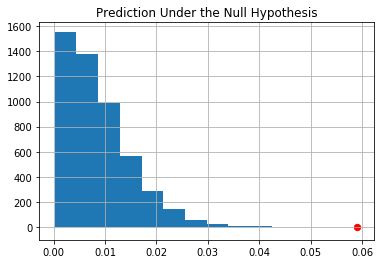

In [211]:
pd.DataFrame(distances).hist();
plt.scatter(observed_distance, 0, color='red', s=40);
plt.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)
print('Empirical P-value:', round(empirical_P, 4) *100, '%')

Since the empirical p-value is very small, the result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that masculine-coded job requirements are associated with low female share in job applications. 

Note that since this is not a randomized experiment where other variables are all controlled, this association does not imply causation.